In [205]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys
sys.path.append('../')

In [2]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.cm
from utils import Trade, Resources, Goal
from collections import defaultdict

In [3]:
exp_path = "../.logs/1698785835082/"
# exp_path = "../.logs/1698477062823"
with open(os.path.join(exp_path,"state.json")) as f:
    exp_state = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../.logs/1698785835082/state.json'

In [4]:
def load_states(paths):
    states = {}
    for exp_path in paths:
        with open(os.path.join(exp_path,"state.json")) as f:
            states[exp_path] = json.load(f)
    return states

In [5]:
def compute_metric_from_state(exp_state, metric_fn, metric_store: defaultdict):
    for agent_id, agent_state in enumerate(exp_state):
         metric_fn(agent_id, agent_state, metric_store)
    return metric_store

def agent_proposal_utility_fn(agent_id, agent_state, metric_store):
    for state in agent_state[1:]:
        if state['proposed_trade'] != "None":
            # convert string into objects
            resources = Resources.from_string(state['resources'])
            goals = Goal.from_string(state['goals'])
            proposed_trade = Trade.from_string(state['proposed_trade'])
            # mini hack to get the right sign
            marginal_utility = goals-resources if agent_id == 0 else resources-goals
            marginal_utility.resource_dict = { k : max(v,0) for k,v in  marginal_utility.resource_dict.items()}
            metric_store[agent_id].append(proposed_trade.minimal_utility(resources, goals, dir=agent_id ))

def agent_success_fn(agent_id, agent_state, metric_store):
    state = agent_state[-1]
    goals = Goal.from_string(state['goals'])
    resources = Resources.from_string(state['resources'])
    goal_reached = goals.goal_reached(resources)
    metric_store[agent_id] = goal_reached



In [6]:
def agent_proposal_utility(states):
    return [compute_metric_from_state(_, agent_proposal_utility_fn, defaultdict(list)) for _ in states.values()]

def agent_success(states):
    return [compute_metric_from_state(_, agent_success_fn, defaultdict(bool)) for _ in states.values()]

def agent_average_success(states):
    success = agent_success(states)
    return { k: sum([trial[k] for trial in success])/len(success)  for k in success[0].keys() }
                          

In [7]:
s = """1698804916694
1698804970941
1698805024195
1698805067135
1698805129590
1698805260351"""

In [8]:
s = [int(k) for k in s.split("\n")]

In [9]:
len(s)

6

In [10]:
fair = s[0:10]
both_rich = s[10:20]
one_poor = s[20:30]
fair_with_beg = s[30:]

In [59]:
len(one_poor)

10

In [11]:
paths = [
    f"../.logs/{f}" for f in fair
]
states = load_states(paths)

In [12]:
proposal_utilities = agent_proposal_utility(states)
success = agent_success(states)
avg_success = agent_average_success(states)

Text(0.5, 1.0, 'Trade Success Rate')

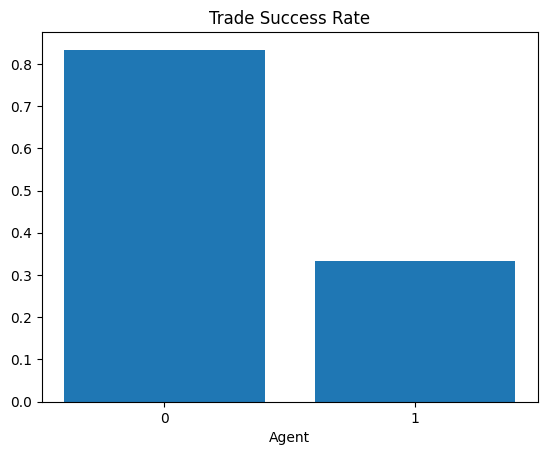

In [13]:
plt.bar(avg_success.keys(), avg_success.values(), tick_label=list(avg_success.keys()))
plt.xlabel('Agent')
plt.title('Trade Success Rate')

In [86]:
proposal_utilities

[defaultdict(list, {0: [5.0, 0.0, 0.0, 0.0, 0.0], 1: [5.0, 5.0, 5.0, 5.0]}),
 defaultdict(list, {0: [5.0], 1: [0.0]}),
 defaultdict(list, {0: [10.0, -3.0], 1: [5.0]}),
 defaultdict(list, {0: [5.0, -3.0], 1: [5.0]}),
 defaultdict(list, {0: [5.0, 0.0], 1: [5.0]}),
 defaultdict(list, {0: [5.0, -3.0], 1: [5.0]}),
 defaultdict(list, {0: [5.0, 0.0], 1: [5.0]}),
 defaultdict(list, {0: [5.0, 0.0], 1: [5.0]}),
 defaultdict(list, {0: [5.0, 0.0], 1: [0.0]}),
 defaultdict(list, {0: [5.0, -1.0], 1: [5.0]})]

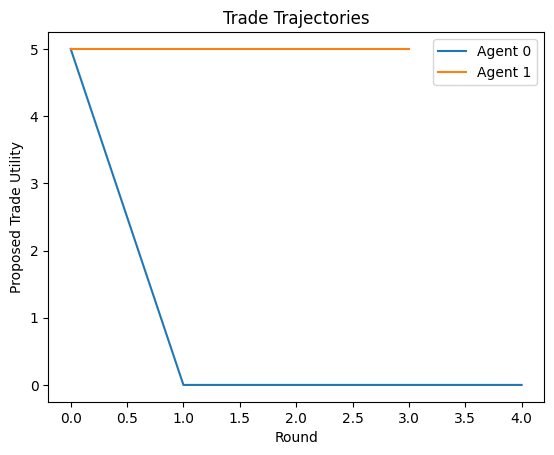

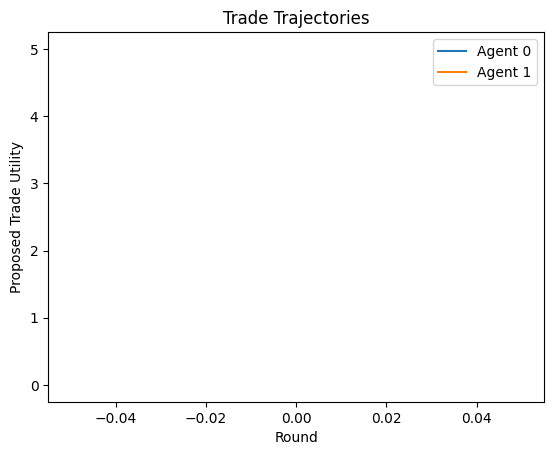

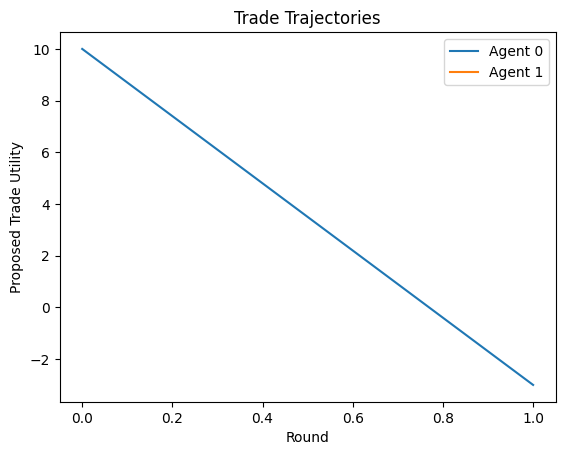

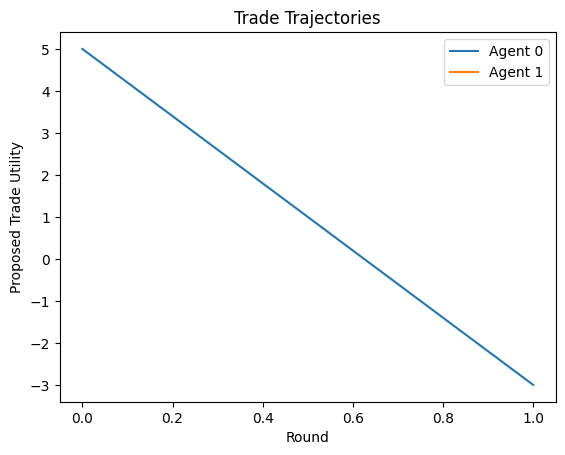

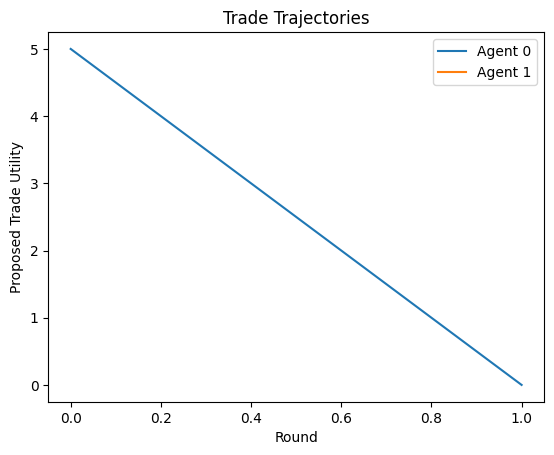

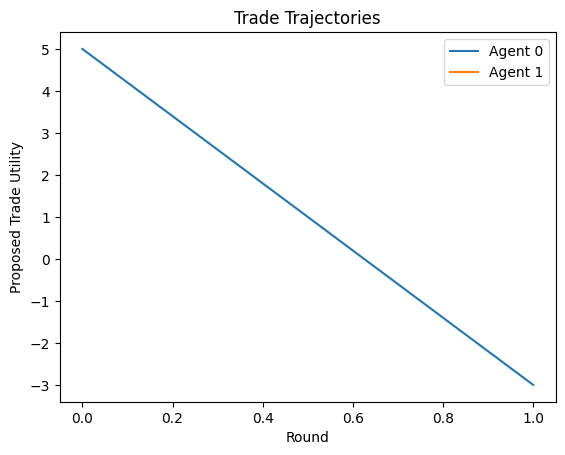

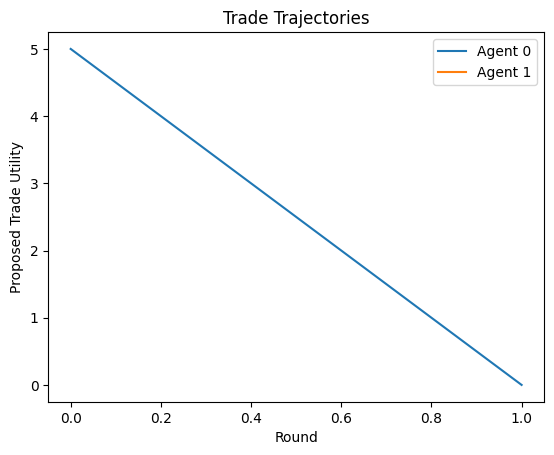

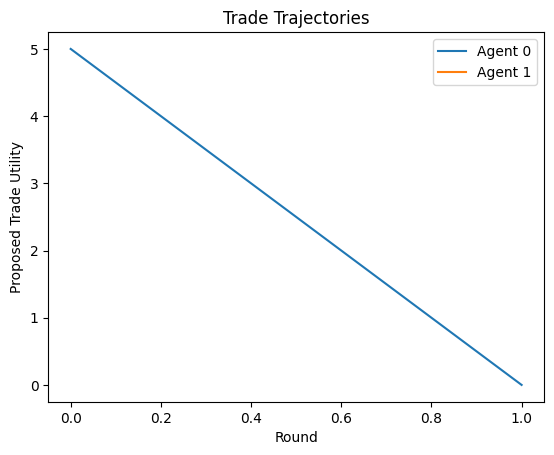

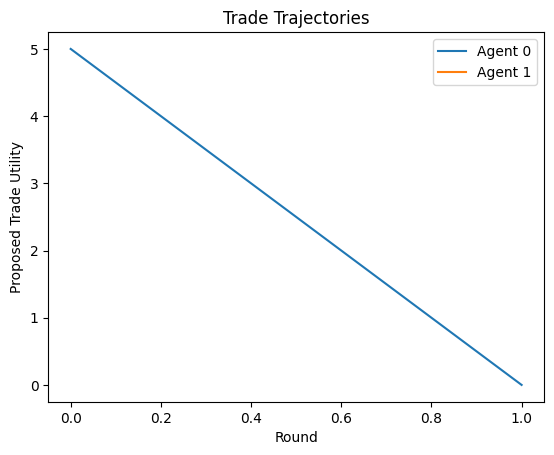

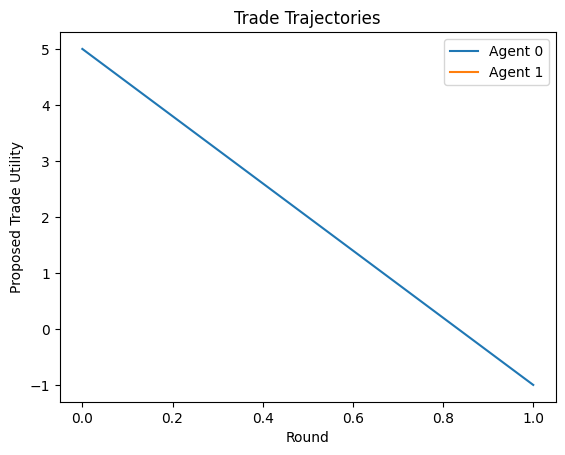

In [87]:
color = matplotlib.cm.datad['tab10']['listed']
for util in proposal_utilities:
    for idx, _ in enumerate(util.values()):
        plt.plot(_, color=color[idx], alpha=1, linewidth=1.5)

    plt.legend(['Agent 0', 'Agent 1'])
    plt.xlabel('Round')
    plt.ylabel('Proposed Trade Utility')
    # plt.yscale('log')
    plt.title("Trade Trajectories")
    plt.show()

In [72]:
proposal_utilities

[defaultdict(list, {0: [5.0, 3.0, 0.0], 1: [0.0, 0.0]}),
 defaultdict(list, {0: [5.0, 0.0, -1.0], 1: [5.0, 5.0]}),
 defaultdict(list, {0: [5.0, 0.0], 1: [0.0]}),
 defaultdict(list, {0: [5.0, -3.0], 1: [5.0]}),
 defaultdict(list, {0: [5.0, 0.0, -1.0], 1: [5.0, 3.0]}),
 defaultdict(list, {0: [8.0, 0.0], 1: [0.0]}),
 defaultdict(list, {0: [0.0], 1: [2.0]}),
 defaultdict(list, {0: [5.0, -3.0], 1: [5.0]})]

In [ ]:
minimal_utility
overall_utility

In [88]:
G ( x = 15, y = 15),

25, 5, minimal => -10, overall 0

(x = 20, y = 10) => minimal -5, overall 0
(x = 20, y = 13) => minimal -2, overall 3
(x = 40, y = 10) => minimal -5, overall 10
(x = 25, y = 0) => minimal -15, overall -5


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (786211949.py, line 3)